# Lead Score Assignment by Dishant and Pandiarajan

## Problem Statement
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

## Case:
Industry professionals can purchase online courses from X Education, a company that provides education. Many experts who are interested in the courses visit their website on any given day and search for courses. On numerous websites and search engines like Google, the firm advertises its courses. Upon arriving at the website, these visitors may browse the courses, submit a form for the course, or watch some videos. These persons are categorised as leads when they fill out a form with their phone number or email address. Additionally, the business receives leads from earlier recommendations. Once these leads are obtained, sales team members begin calling, sending emails, etc. Some leads are converted during this procedure, but most are not. At X Education, the normal lead conversion rate is roughly 30%. X Education currently has an extremely low lead conversion rate despite receiving a large number of leads. The business wants you to create a model in which you give each lead a lead score so that leads with higher lead scores have a better chance of converting, while leads with lower lead scores have a lesser chance of converting. The desired lead conversion rate has been estimated by the CEO to be in the range of 80%.

## Goal:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Following steps are performed:
1. Reading and Understanding the data
2. Data Cleaning
3. Outlier Analysis
4. Visualising Data
5. Creating dummy variable
6. Splitting the Data into Training and Testing Sets
7. Feature Scaling using Min Max Scaling
8. Looking at Correlations
9. Feature Selection Using RFE
10. Model Building-Assessing the model with StatsModels
11. Creating Prediction
12. Model Evaluation
13. Plotting the ROC Curve ('Receiver Operating Characteristic' Curve)
14. Finding Optimal Cutoff Point
15. Making predictions on the test set
16. Final Observation
17. Conclusion

In [1]:
#Importing all the required libraries and ignoring warnings:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## 1. Reading and understanding the data

In [2]:
Leads = pd.read_csv("Leads.csv")

In [3]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Finding number of rows and columns
Leads.shape

(9240, 37)

In [5]:
# Checking the detailed information of the lead data by using info() function:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the statistical information of the data:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning 

In [7]:
# Finding the null values
Leads.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

### Inference:
We can observe from the information above that many columns have more than 3000 missing rows. It's best to remove these columns.

In [8]:
for x in Leads.columns:
    if Leads[x].isnull().sum()>3000:
        print(x , "has the null values: " , Leads[x].isnull().sum())
        Leads.drop(x , 1 , inplace=True)
        print("Dropped" , x)

Tags has the null values:  3353
Dropped Tags
Lead Quality has the null values:  4767
Dropped Lead Quality
Asymmetrique Activity Index has the null values:  4218
Dropped Asymmetrique Activity Index
Asymmetrique Profile Index has the null values:  4218
Dropped Asymmetrique Profile Index
Asymmetrique Activity Score has the null values:  4218
Dropped Asymmetrique Activity Score
Asymmetrique Profile Score has the null values:  4218
Dropped Asymmetrique Profile Score


In [9]:
#Checking what is left now after dropping more than 3000 missing rows
Leads.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Do Not Call                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Email                                        0
Lead Origin                 

In [10]:
#Have 2500 missing values in 5 columns, let's obtain the unique value counts for all columns to verify this.
Leads.nunique().sort_values()

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Newspaper Article                                   2
Search                                              2
A free copy of Mastering The Interview              2
Digital Advertisement                               2
Through Recommendations                             2
Newspaper                                           2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
X Education Forums                                  2
What matters most to you in choosing a course       3
Lead Origin                                         5
Lead Profile                                        6
What is your current occupat

In [11]:
# Checking the columns which are not important for our analysis
print(Leads["Country"].value_counts().sort_values(ascending = False))
print('\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> \n')
print(Leads["City"].value_counts().sort_values(ascending = False))
print('\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> \n')
print(Leads["Lead Number"].value_counts)
print('\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> \n')
print(Leads["Prospect ID"].value_counts)
print('\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> \n')

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
Belgium                    2
Philippines                2
Ghana                      2
Netherlands                2
China                      2
Italy                      2
Bangladesh                 2
Uganda                     2
Asia/Pacific Region        2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

### From the above data we can find out that Country, City, Lead number and Prospect ID have all unique values which are not useful for our data analysis,so we can drop them.

In [12]:
Leads.drop(["Lead Number" , "Prospect ID" , "Country" , "City"] , axis= 1 , inplace = True)

In [13]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Select,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Select,No,No,Modified


In [14]:
Leads.shape

(9240, 27)

In [15]:
# Checking null values again:
Leads.isnull().sum().sort_values()

Lead Origin                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
A free copy of Mastering The Interview              0
Search                                              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Last Notable Activity                               0
Lead Source                 

In [16]:
# Checking percentage of missing values:
missing_values_precent = round(100*(Leads.isnull().sum()/len(Leads)),2)
print(missing_values_precent.sort_values())

Lead Origin                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Last Notable Activity                             0.00
Lead Sourc

### There are a few columns with the level "Select," which indicates that students have not chosen any options for that column. Since these values are null, we must locate the value counts of the "Select" columns and remove them because they are useless for our study.

In [17]:
# Checking the value counts of all the columns

for c in Leads:
    print(Leads[c].astype('category').value_counts())
    print('\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> \n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

No     8506
Yes     734
Name: Do Not Email, dtype: int64

 >>>>>>>>>>>>>>>>>

### There are three columns Lead Profile, How did you hear about X Education and Specialization having "Select" columns

In [18]:
# Checking 'Lead Profile' value_counts 
Leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [19]:
# Checking "How did you hear about X Education" value_counts
Leads['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
# Checking "Specialization" value_counts
Leads['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### From the above we can see that these two columns has lots of missing values

1. Lead Profile = 4146
2. How did you hear about X Education= 5043

So it's better to drop these columns

In [21]:
Leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [22]:
# Checking null values again:
Leads.isnull().sum().sort_values()

Lead Origin                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
A free copy of Mastering The Interview              0
Search                                              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Last Notable Activity                               0
Lead Source                 

In [23]:
# Checking the "What matters most to you in choosing a course" value_counts
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# Droping the null value rows present in the variable 'What matters most to you in choosing a course'

Leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [25]:
# Checking null values again:
Leads.isnull().sum().sort_values()

Lead Origin                                    0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper                                      0
X Education Forums                             0
Newspaper Article                              0
Magazine                                       0
Search                                         0
Total Time Spent on Website                    0
Converted                                      0
Do Not Call                                    0
Do Not Email                                   0
A free copy of Mastering The Interview         0
Last Notable Activity                          0
Lead Source                                   36
Last Activity                                103
Page Views Per Visit

In [26]:
# Checking the "What is your current occupation" value_counts
Leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

"What is your current occupation" has lot of null values so dropping the whole column will not be significant so, draw analysis so its better to drop only null values from the column

In [27]:
Leads= Leads[~pd.isnull(Leads['What is your current occupation'])]

In [28]:
# Checking null values again:
Leads.isnull().sum().sort_values()

Lead Origin                                   0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
X Education Forums                            0
Newspaper Article                             0
Magazine                                      0
Search                                        0
What is your current occupation               0
Total Time Spent on Website                   0
Converted                                     0
Do Not Call                                   0
Do Not Email                                  0
A free copy of Mastering The Interview        0
Last Notable Activity                         0
Specialization                               18
Lead Source                             

In [29]:
# Dropping the rows ( Specialization , Lead Source , TotalVisits ) in which null values are present
Leads = Leads[~pd.isnull(Leads['TotalVisits'])]
Leads = Leads[~pd.isnull(Leads['Specialization'])]
Leads = Leads[~pd.isnull(Leads['Lead Source'])]

In [30]:
# Checking null values again
Leads.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

### Null values in the columns now have been either imputed or have been dropped to the columns which have more than 70% data concentrated towards one value. 

In [31]:
# Checking value counts of all the columns

for x in Leads:
    print(Leads[x].astype('category').value_counts())
    print('\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> \n')

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Pay per Click Ads       1
Press_Release           1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

No     5938
Yes     435
Name: Do Not Email, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

No     6371
Yes       2
Name: Do Not Call, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

### Following columns are skewed towards "No", it is better to drop these columns:

1. Do Not Call
2. Search
3. Magazine
4. Newspaper Article
5. X Education Forums
6. Newspaper
7. Digital Advertisement
8. Through Recommendations
9. Receive More Updates About Our Courses
10. Update me on Supply Chain Content
11. Get updates on DM Content
12. I agree to pay the amount through cheque

In [32]:
Leads = Leads.drop(['Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content', 
                  'I agree to pay the amount through cheque'], axis=1)

In [33]:
# Checking null values again:
Leads.isnull().sum().sort_values

<bound method Series.sort_values of Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64>

### We have clean the data and have no null values

In [34]:
Leads.shape

(6373, 12)

In [35]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [36]:
# Converting yes and no values into binary form 1 and 0 
print(Leads["Do Not Email"].value_counts())
print(Leads["A free copy of Mastering The Interview"].value_counts())

No     5938
Yes     435
Name: Do Not Email, dtype: int64
No     4202
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64


In [37]:
# Replacing the values of yes =1 and No= 0
Leads["Do Not Email"].replace(to_replace = "No" , value = 0 , inplace = True)
Leads["Do Not Email"].replace(to_replace = "Yes" , value = 1 , inplace = True)
Leads["A free copy of Mastering The Interview"].replace(to_replace = "No" , value = 0 , inplace = True)
Leads["A free copy of Mastering The Interview"].replace(to_replace = "Yes" , value = 1 , inplace = True)

In [38]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


## 3. Outlier Analysis

In [39]:
# Checking the data at 25%,50%,75%,90%,95% and above
Leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.068257,0.480935,3.624196,535.224541,2.480464,0.340656
std,0.252206,0.499676,5.048555,565.374753,2.167364,0.473967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,34.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,287.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,1022.000000,3.500000,1.000000
90%,0.000000,1.000000,8.000000,1428.800000,5.000000,1.000000
95%,1.000000,1.000000,10.000000,1592.400000,6.000000,1.000000
99%,1.000000,1.000000,18.000000,1849.280000,9.000000,1.000000


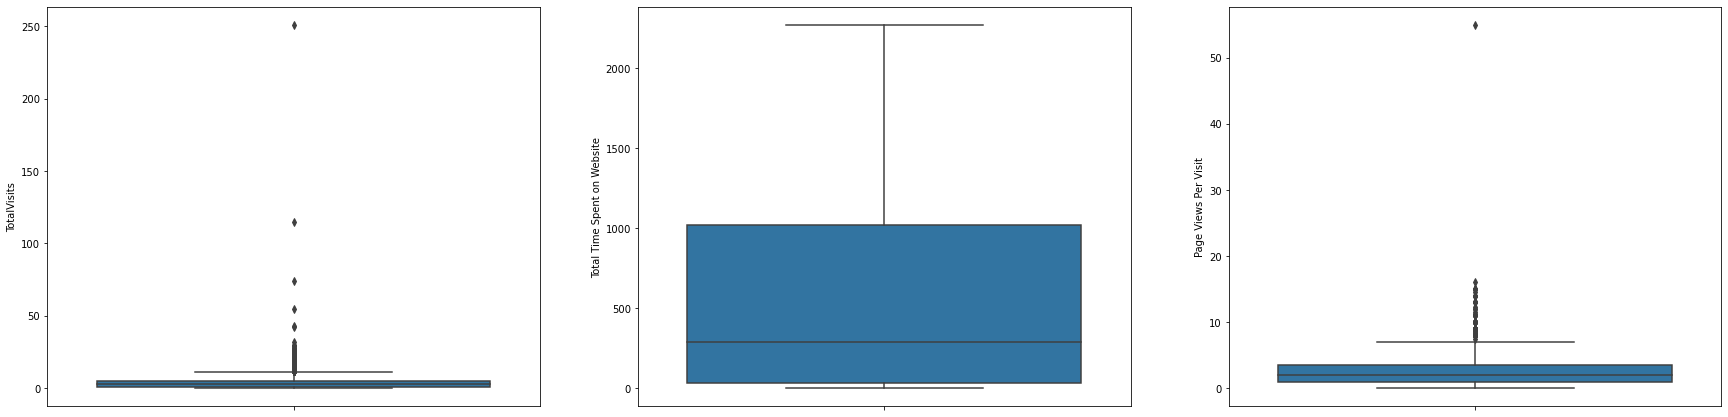

In [40]:
# We can see that outliers is there in the columns TotalVisits and Page Views Per Visit columns
# Checking the outliers for all the numeric columns

plt.figure(figsize=(30, 25))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = Leads)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = Leads)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = Leads)
plt.show()

In [41]:
# Removing values beyond 99% for Total Visits

total_visits = Leads['TotalVisits'].quantile(0.99)
Leads = Leads[Leads["TotalVisits"] < total_visits]
Leads["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    6308.000000
mean        3.363824
std         3.007681
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        14.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [42]:
# Removing values beyond 99% for page Views Per Visit

page_visits = Leads['Page Views Per Visit'].quantile(0.99)
Leads = Leads[Leads["Page Views Per Visit"] < page_visits]
Leads["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    6226.000000
mean        2.347920
std         1.828861
min         0.000000
25%         1.000000
50%         2.000000
75%         3.250000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.500000
Name: Page Views Per Visit, dtype: float64

In [43]:
# Checking data again at 25%,50%,75%,90%,95% and above after removing values at 99 percentile
Leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000
mean,0.066817,0.480726,3.270800,530.808063,2.347920,0.334083
std,0.249724,0.499669,2.907667,565.111571,1.828861,0.471707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,30.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,281.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,1020.000000,3.250000,1.000000
90%,0.000000,1.000000,7.000000,1421.000000,5.000000,1.000000
95%,1.000000,1.000000,9.000000,1590.750000,6.000000,1.000000
99%,1.000000,1.000000,13.000000,1848.500000,7.000000,1.000000


In [44]:
# Finding the percentage of data retained

percent_data = round(100*(len(Leads)/9240),2)
print(percent_data)

67.38


1. Data has been cleaned and upto 68% of data has been retained..
2. On this cleaned data we will do the data analysis

## 4. Visualising Data

In [45]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6226 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6226 non-null   object 
 1   Lead Source                             6226 non-null   object 
 2   Do Not Email                            6226 non-null   int64  
 3   Converted                               6226 non-null   int64  
 4   TotalVisits                             6226 non-null   float64
 5   Total Time Spent on Website             6226 non-null   int64  
 6   Page Views Per Visit                    6226 non-null   float64
 7   Last Activity                           6226 non-null   object 
 8   Specialization                          6226 non-null   object 
 9   What is your current occupation         6226 non-null   object 
 10  A free copy of Mastering The Interview  6226 non-null   int6

### Univariate Analysis - Numerical Variables

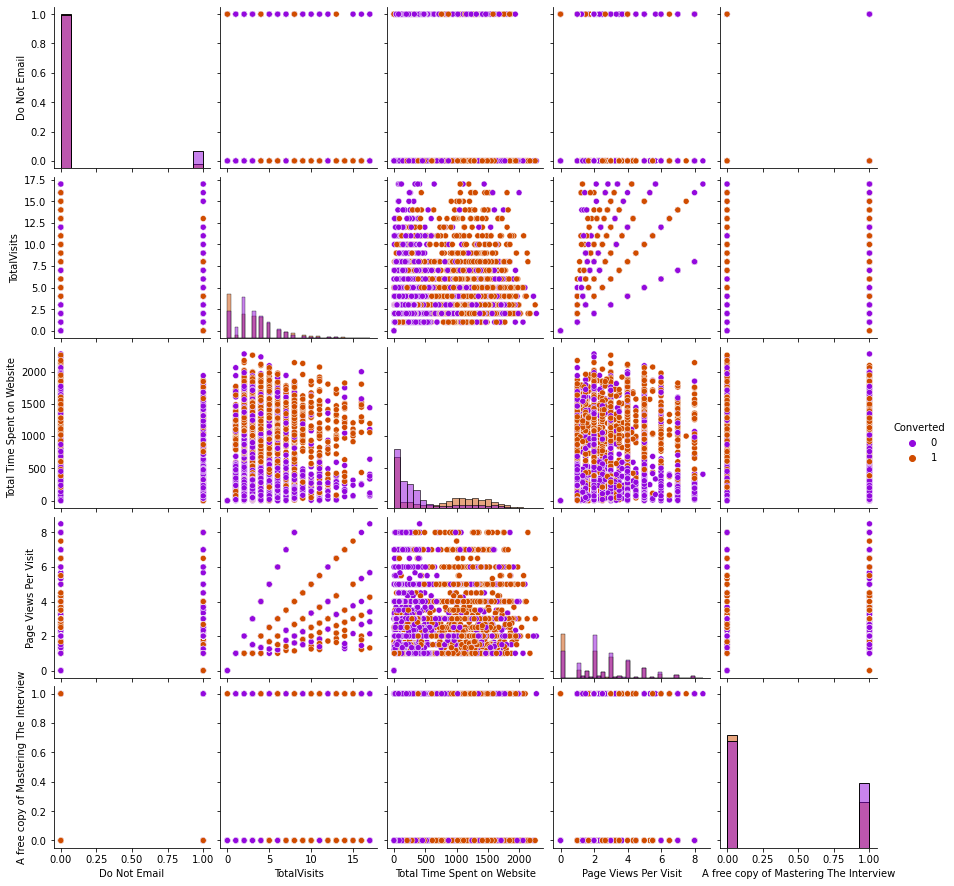

In [46]:
# Finding the relation between 
sns.pairplot(Leads,diag_kind='hist',hue='Converted' , palette = "gnuplot" )

plt.grid()
plt.show()

### Inference:

We can observe from the pairplot above that some independent factors have a positive correlation with the variable labelled "Converted."

Heatmaps are highly helpful for plotting many correlations in a single plot.

In [47]:
Leads_corr = Leads.corr()
Leads_corr

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Do Not Email,1.000000,-0.146742,-0.014304,-0.056182,0.012443,0.050487
Converted,-0.146742,1.000000,0.007242,0.310474,-0.067021,-0.096721
TotalVisits,-0.014304,0.007242,1.000000,0.344701,0.698838,0.259632
Total Time Spent on Website,-0.056182,0.310474,0.344701,1.000000,0.346489,0.153939
Page Views Per Visit,0.012443,-0.067021,0.698838,0.346489,1.000000,0.262257
A free copy of Mastering The Interview,0.050487,-0.096721,0.259632,0.153939,0.262257,1.000000


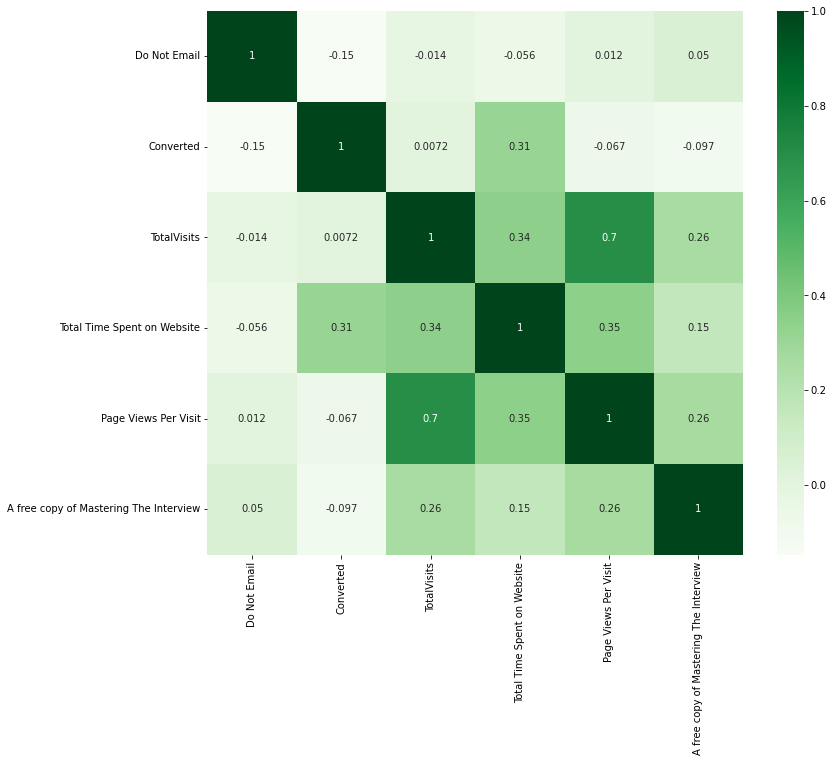

In [48]:
#Checking correlations of numeric values

plt.figure(figsize=(12,10))

sns.heatmap(Leads.corr(), cmap="Greens", annot=True)
plt.show()

### Inference: 
According to the heatmap, the variables are correlated with one another once the data has been cleaned, and we can now create a logistic regression model using the cleaned data.

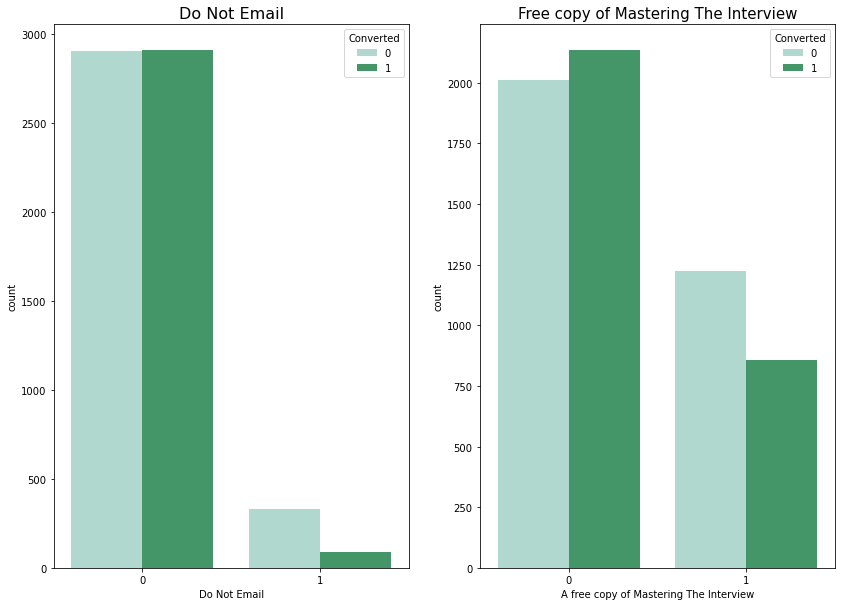

In [49]:
plt.figure(figsize=(14,10))

plt.subplot(1,2,1)
s1 = sns.countplot(Leads['Do Not Email'], hue=Leads.Converted, palette = "BuGn" )
plt.title("Do Not Email", fontdict={'fontsize': 16, 'color' : 'black'})

plt.subplot(1,2,2)
s2 = sns.countplot(Leads['A free copy of Mastering The Interview'], hue=Leads.Converted,  palette = "BuGn")
plt.title("Free copy of Mastering The Interview", fontdict={'fontsize': 15, 'color' : 'black'})

plt.show()

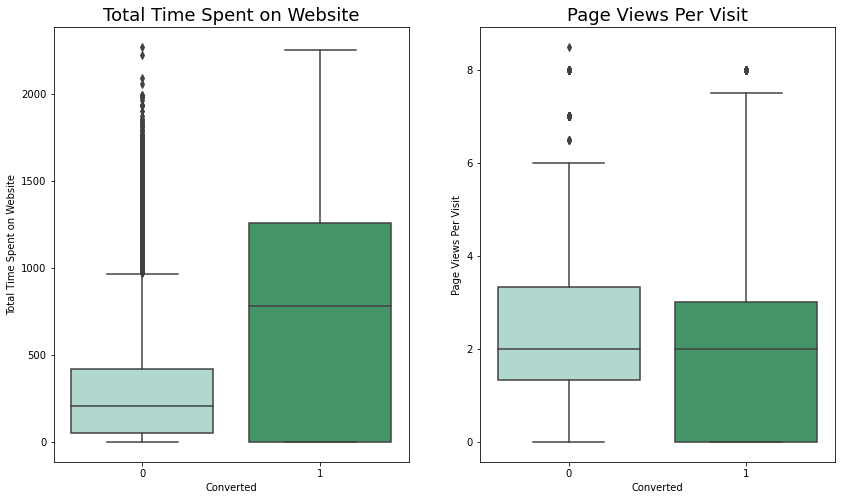

In [50]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.boxplot(Leads["Converted"] , Leads["Total Time Spent on Website"] , palette = "BuGn")
plt.title("Total Time Spent on Website", fontdict={'fontsize': 18, 'color' : 'black'})

plt.subplot(1,2,2)
sns.boxplot(Leads["Converted"] , Leads["Page Views Per Visit"] , palette = "BuGn")
plt.title("Page Views Per Visit", fontdict={'fontsize': 18, 'color' : 'black'})

plt.show()

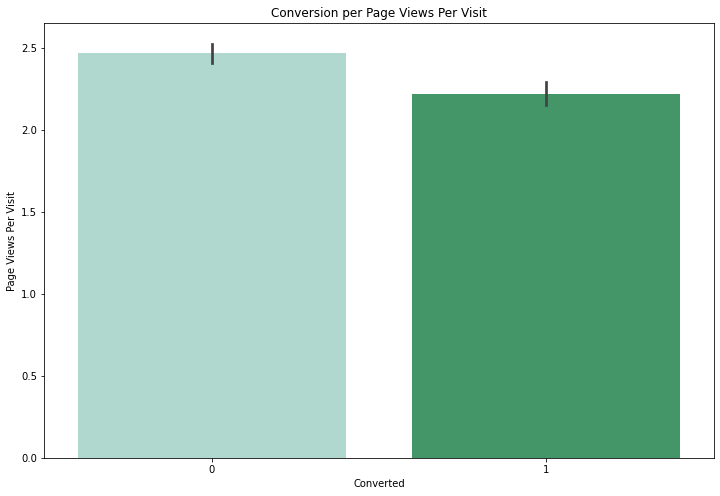

In [51]:
plt.figure(figsize=(12,8))
plt.title("Conversion per Page Views Per Visit")
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = Leads, palette= "BuGn")
plt.show()

### Univariate Analysis - Categorical Variables

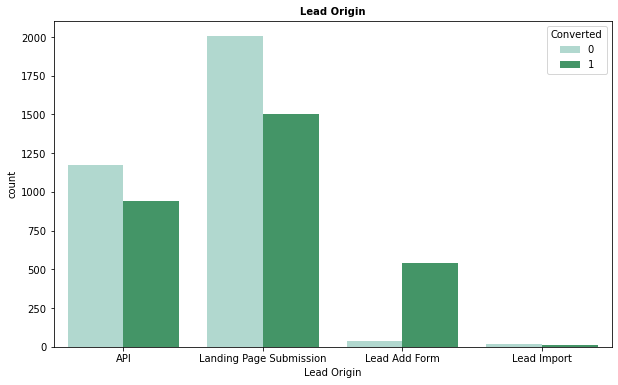

In [52]:
# plotting graphs of all the categorical columns:

plt.figure(figsize = (10,6))
plt.subplots_adjust(hspace=0.2)
sns.countplot(Leads['Lead Origin'], hue = Leads.Converted, palette = "BuGn")
plt.title('Lead Origin', fontsize = 10, fontweight = 'bold')

plt.show()

### Inference:
The Lead Origin- Landing Page Submission has the highest conversion rate among others.

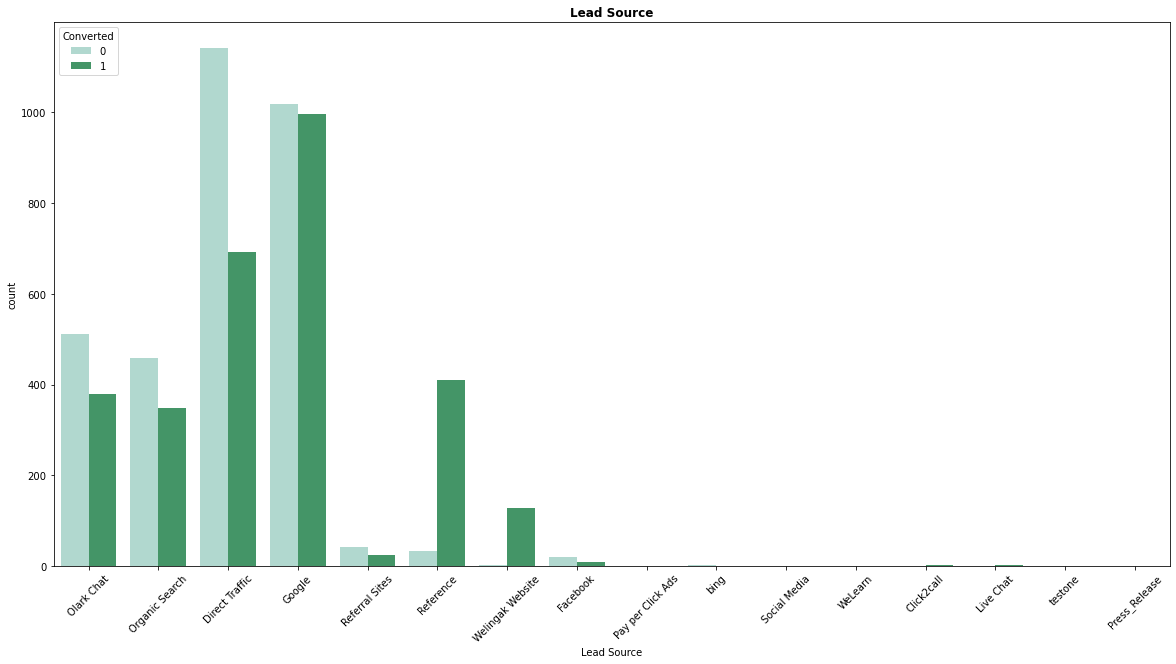

In [53]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace=0.2)

sns.countplot(Leads['Lead Source'], hue = Leads.Converted, palette = "BuGn")
plt.title('Lead Source', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()


### Inference:
Google has the highest conversion rate.

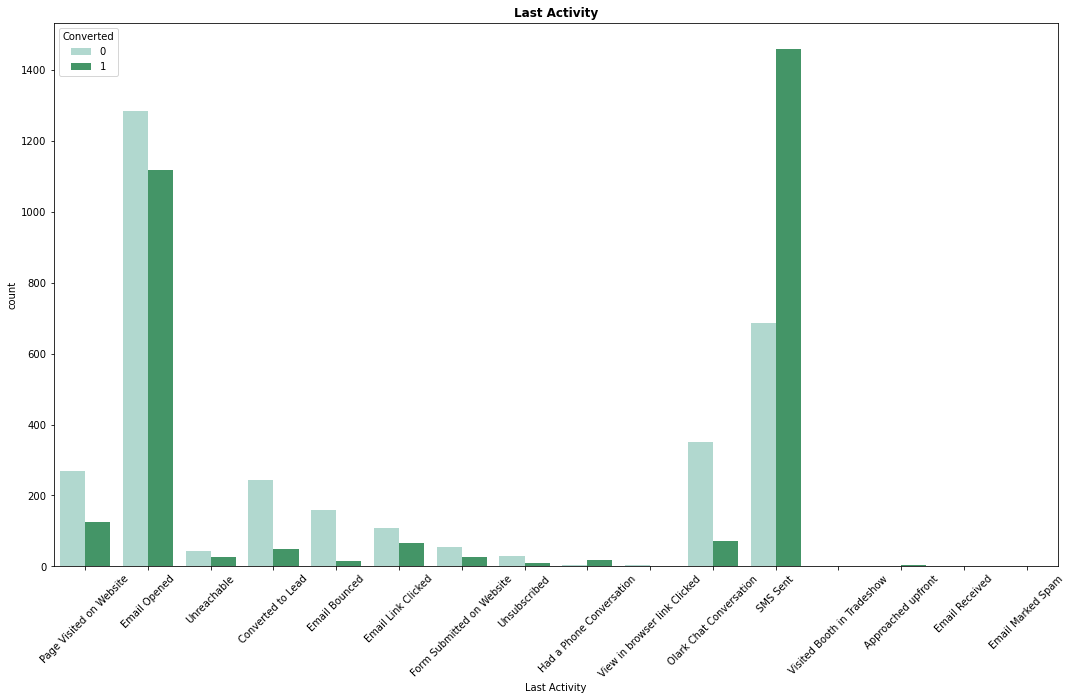

In [54]:
plt.figure(figsize = (18,10))
plt.subplots_adjust(hspace=0.2)

sns.countplot(Leads['Last Activity'], hue = Leads.Converted, palette = "BuGn")
plt.title('Last Activity', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 45)


plt.show()

### Inference:
Leads whose Last Activity was SMS sent had the best conversion rate.

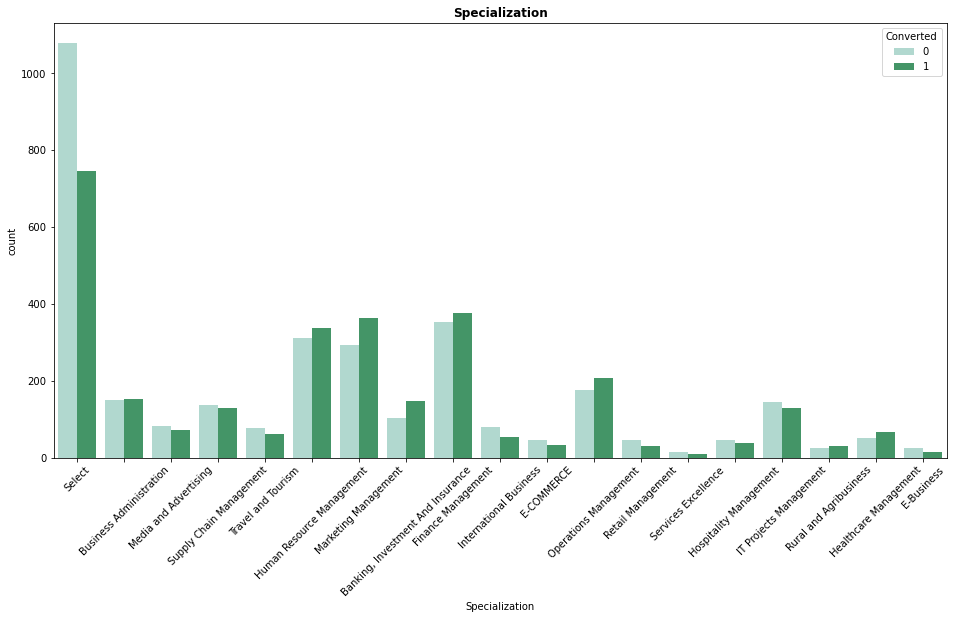

In [55]:
plt.figure(figsize = (16,8))
plt.subplots_adjust(hspace=0.2)

sns.countplot(Leads['Specialization'], hue = Leads.Converted, palette = "BuGn")
plt.title('Specialization', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 45)


plt.show()

### Inference:
Lead from Specialization who are unknown/Select columns has the highest rate of conversion.

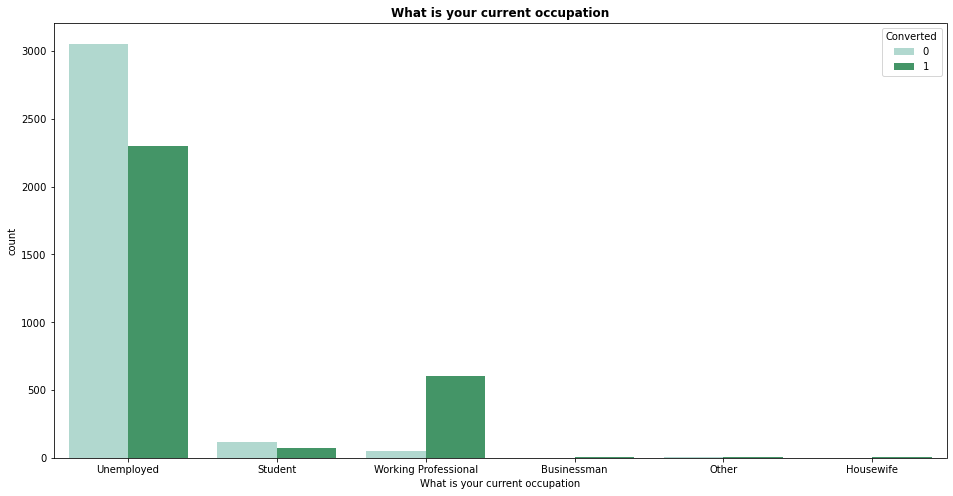

In [56]:
plt.figure(figsize = (16,8))
plt.subplots_adjust(hspace=0.2)

sns.countplot(Leads['What is your current occupation'], hue = Leads.Converted, palette = "BuGn")
plt.title('What is your current occupation', fontsize = 12, fontweight = 'bold')
plt.show()

### Inference:
Person who are unemployed has the highest conversion rate comparatively to working professional.

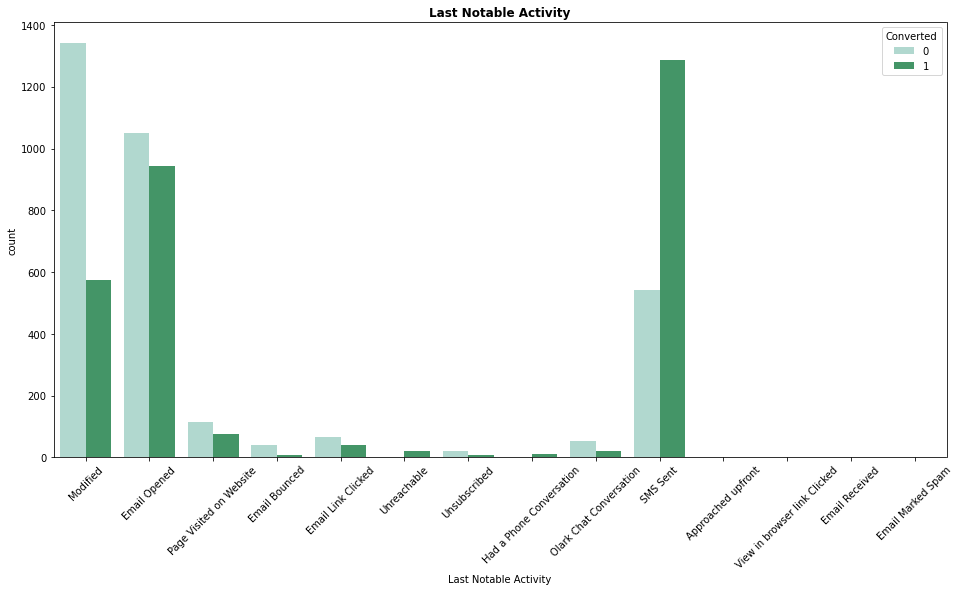

In [57]:
plt.figure(figsize = (16,8))
plt.subplots_adjust(hspace=0.2)

sns.countplot(Leads['Last Notable Activity'], hue = Leads.Converted, palette = "BuGn")
plt.title('Last Notable Activity', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

### Inference:
Students whose Last Notable Activity was found to be SMS Sent had the best conversion rate.

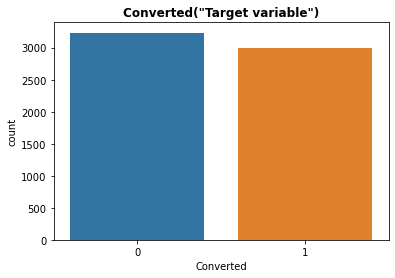

In [58]:
sns.countplot(Leads['Converted'])
plt.title('Converted("Target variable")', fontsize = 12, fontweight = 'bold')
plt.show()

In [59]:
# Checking the percentage of conversion rate yes=1 no=0
Leads['Converted'].value_counts(normalize=True)*100

0    51.927401
1    48.072599
Name: Converted, dtype: float64

### Inference:
From the dataset, can see that the convertion rate is 48.07%.

## 5. Creating Dummy Variables

In [60]:
# Creating dummies for the following columns:

# Lead Origin : 

dummy_lead_origin = pd.get_dummies(Leads['Lead Origin'], prefix='LeadOrigin')
# Dropping Lead Import column
new_lead_origin = dummy_lead_origin.drop(['LeadOrigin_Lead Import'], 1)
#Adding the results to the original dataframe
Leads = pd.concat([Leads, new_lead_origin], axis = 1)

# Lead Source :

dummy_lead_source = pd.get_dummies(Leads['Lead Source'], prefix='LeadSource')
# Dropping Pay per Click Ads column
new_lead_source = dummy_lead_source.drop(['LeadSource_Pay per Click Ads'], 1)
# Adding the results to the original dataframe
Leads = pd.concat([Leads,new_lead_source], axis=1)

# last Activity

dummy_last_activity = pd.get_dummies(Leads['Last Activity'], prefix='LastActivity')
# Dropping Email Marked Spam column
new_last_activity = dummy_last_activity.drop(['LastActivity_Email Marked Spam'], 1)
# Adding the results to the original dataframe
Leads = pd.concat([Leads,new_last_activity], axis=1)

# What is your current occupation

dummy_current_occupation = pd.get_dummies(Leads['What is your current occupation'], prefix='CurrentOccupation')
# Dropping Housewife column
new_current_occupation = dummy_current_occupation.drop(['CurrentOccupation_Housewife'], 1)
# Adding the results to the original dataframe
Leads = pd.concat([Leads,new_current_occupation], axis=1)

# Last Notable Activity

dummy_last_notable_activity = pd.get_dummies(Leads['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Approached upfront column
new_last_notable_activity = dummy_last_notable_activity.drop(['LastNotableActivity_Approached upfront'], 1)
# Adding the results to the original dataframe
Leads = pd.concat([Leads,new_last_notable_activity], axis=1)

Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


Now that we have made dummy variables,next step is to remove the original attributes along with the columns which do not hold explanatory power.

In [61]:
# Since in Specialization we have certain null values as "Select" so using value_counts() finding the null values
Leads["Specialization"].value_counts()

Select                               1822
Finance Management                    729
Marketing Management                  655
Human Resource Management             646
Operations Management                 383
Business Administration               302
IT Projects Management                272
Supply Chain Management               265
Banking, Investment And Insurance     251
Media and Advertising                 155
Travel and Tourism                    139
International Business                133
Healthcare Management                 117
Hospitality Management                 85
E-COMMERCE                             77
Retail Management                      76
Rural and Agribusiness                 55
E-Business                             40
Services Excellence                    24
Name: Specialization, dtype: int64

In [62]:
# Creating dummy varibale for specialization and Dropping  "Select columns" from specialization
Leads_specialization = pd.get_dummies(Leads['Specialization'], prefix = 'Specialization')
Leads_specialization = Leads_specialization.drop(['Specialization_Select'], 1)
Leads = pd.concat([Leads, Leads_specialization], axis = 1)

In [63]:
# After creating dummy varaibles for the following columns now we are removing  all the duplicates columns: 
Leads_columns = Leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization',
           'What is your current occupation', 'Last Notable Activity'], 
           axis=1, inplace = True)
Leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Click2call,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6. Splitting the Data into Training and Testing Sets

In [64]:
# Putting feature variable to X
X = Leads.drop(['Converted'], axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Click2call,LeadSource_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [67]:
X_train.shape, y_train.shape

((4358, 74), (4358,))

In [68]:
X_test.shape, y_test.shape

((1868, 74), (1868,))

## 7. Feature Scaling using Min Max Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Click2call,LeadSource_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4305,0,0.352941,0.164173,0.705882,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2675,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7045,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2027,0,0.294118,0.453345,0.588235,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1410,0,0.294118,0.129401,0.588235,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [71]:
# Checking the Conversion Rate
converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
converted

48.07259877931256

## 8. Looking at Correlations

In [72]:
Leads.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Click2call,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Do Not Email,1.000000,-0.146742,-0.014304,-0.056182,0.012443,0.050487,-0.064013,0.078688,-0.026011,-0.006785,...,0.046656,0.013851,-0.026761,0.015041,-0.009613,0.017116,0.015983,0.045635,-0.005437,0.046640
Converted,-0.146742,1.000000,0.007242,0.310474,-0.067021,-0.096721,-0.051804,-0.119200,0.292191,0.013665,...,-0.004337,-0.022093,0.049376,-0.005184,0.031953,-0.016205,0.008795,-0.007976,0.000968,-0.012666
TotalVisits,-0.014304,0.007242,1.000000,0.344701,0.698838,0.259632,-0.214807,0.408697,-0.332249,0.008539,...,0.040633,0.049664,0.018118,0.058158,0.031334,0.023856,0.045522,0.028974,0.049871,0.099224
Total Time Spent on Website,-0.056182,0.310474,0.344701,1.000000,0.346489,0.153939,-0.129252,0.278258,-0.250348,-0.000979,...,0.026372,0.011749,0.052818,0.039170,0.051450,0.024940,0.019898,0.003053,0.045601,0.036541
Page Views Per Visit,0.012443,-0.067021,0.698838,0.346489,1.000000,0.262257,-0.297234,0.519938,-0.386333,-0.015223,...,0.055778,0.071161,0.034473,0.070601,0.039338,0.030625,0.032321,0.012487,0.056126,0.109374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,0.017116,-0.016205,0.023856,0.024940,0.030625,0.032902,-0.058023,0.071341,-0.025565,-0.002819,...,-0.023760,-0.016424,-0.038117,-0.017763,-0.028461,1.000000,-0.010495,-0.006915,-0.023439,-0.016799
Specialization_Rural and Agribusiness,0.015983,0.008795,0.045522,0.019898,0.032321,0.053225,-0.038638,0.048519,-0.018447,-0.002394,...,-0.020178,-0.013948,-0.032371,-0.015085,-0.024170,-0.010495,1.000000,-0.005873,-0.019905,-0.014266
Specialization_Services Excellence,0.045635,-0.007976,0.028974,0.003053,0.012487,0.038368,-0.033622,0.039096,-0.011020,-0.001577,...,-0.013296,-0.009191,-0.021330,-0.009940,-0.015927,-0.006915,-0.005873,1.000000,-0.013116,-0.009400
Specialization_Supply Chain Management,-0.005437,0.000968,0.049871,0.045601,0.056126,0.105375,-0.097293,0.113464,-0.034729,-0.005346,...,-0.045065,-0.031151,-0.072297,-0.033690,-0.053981,-0.023439,-0.019905,-0.013116,1.000000,-0.031862


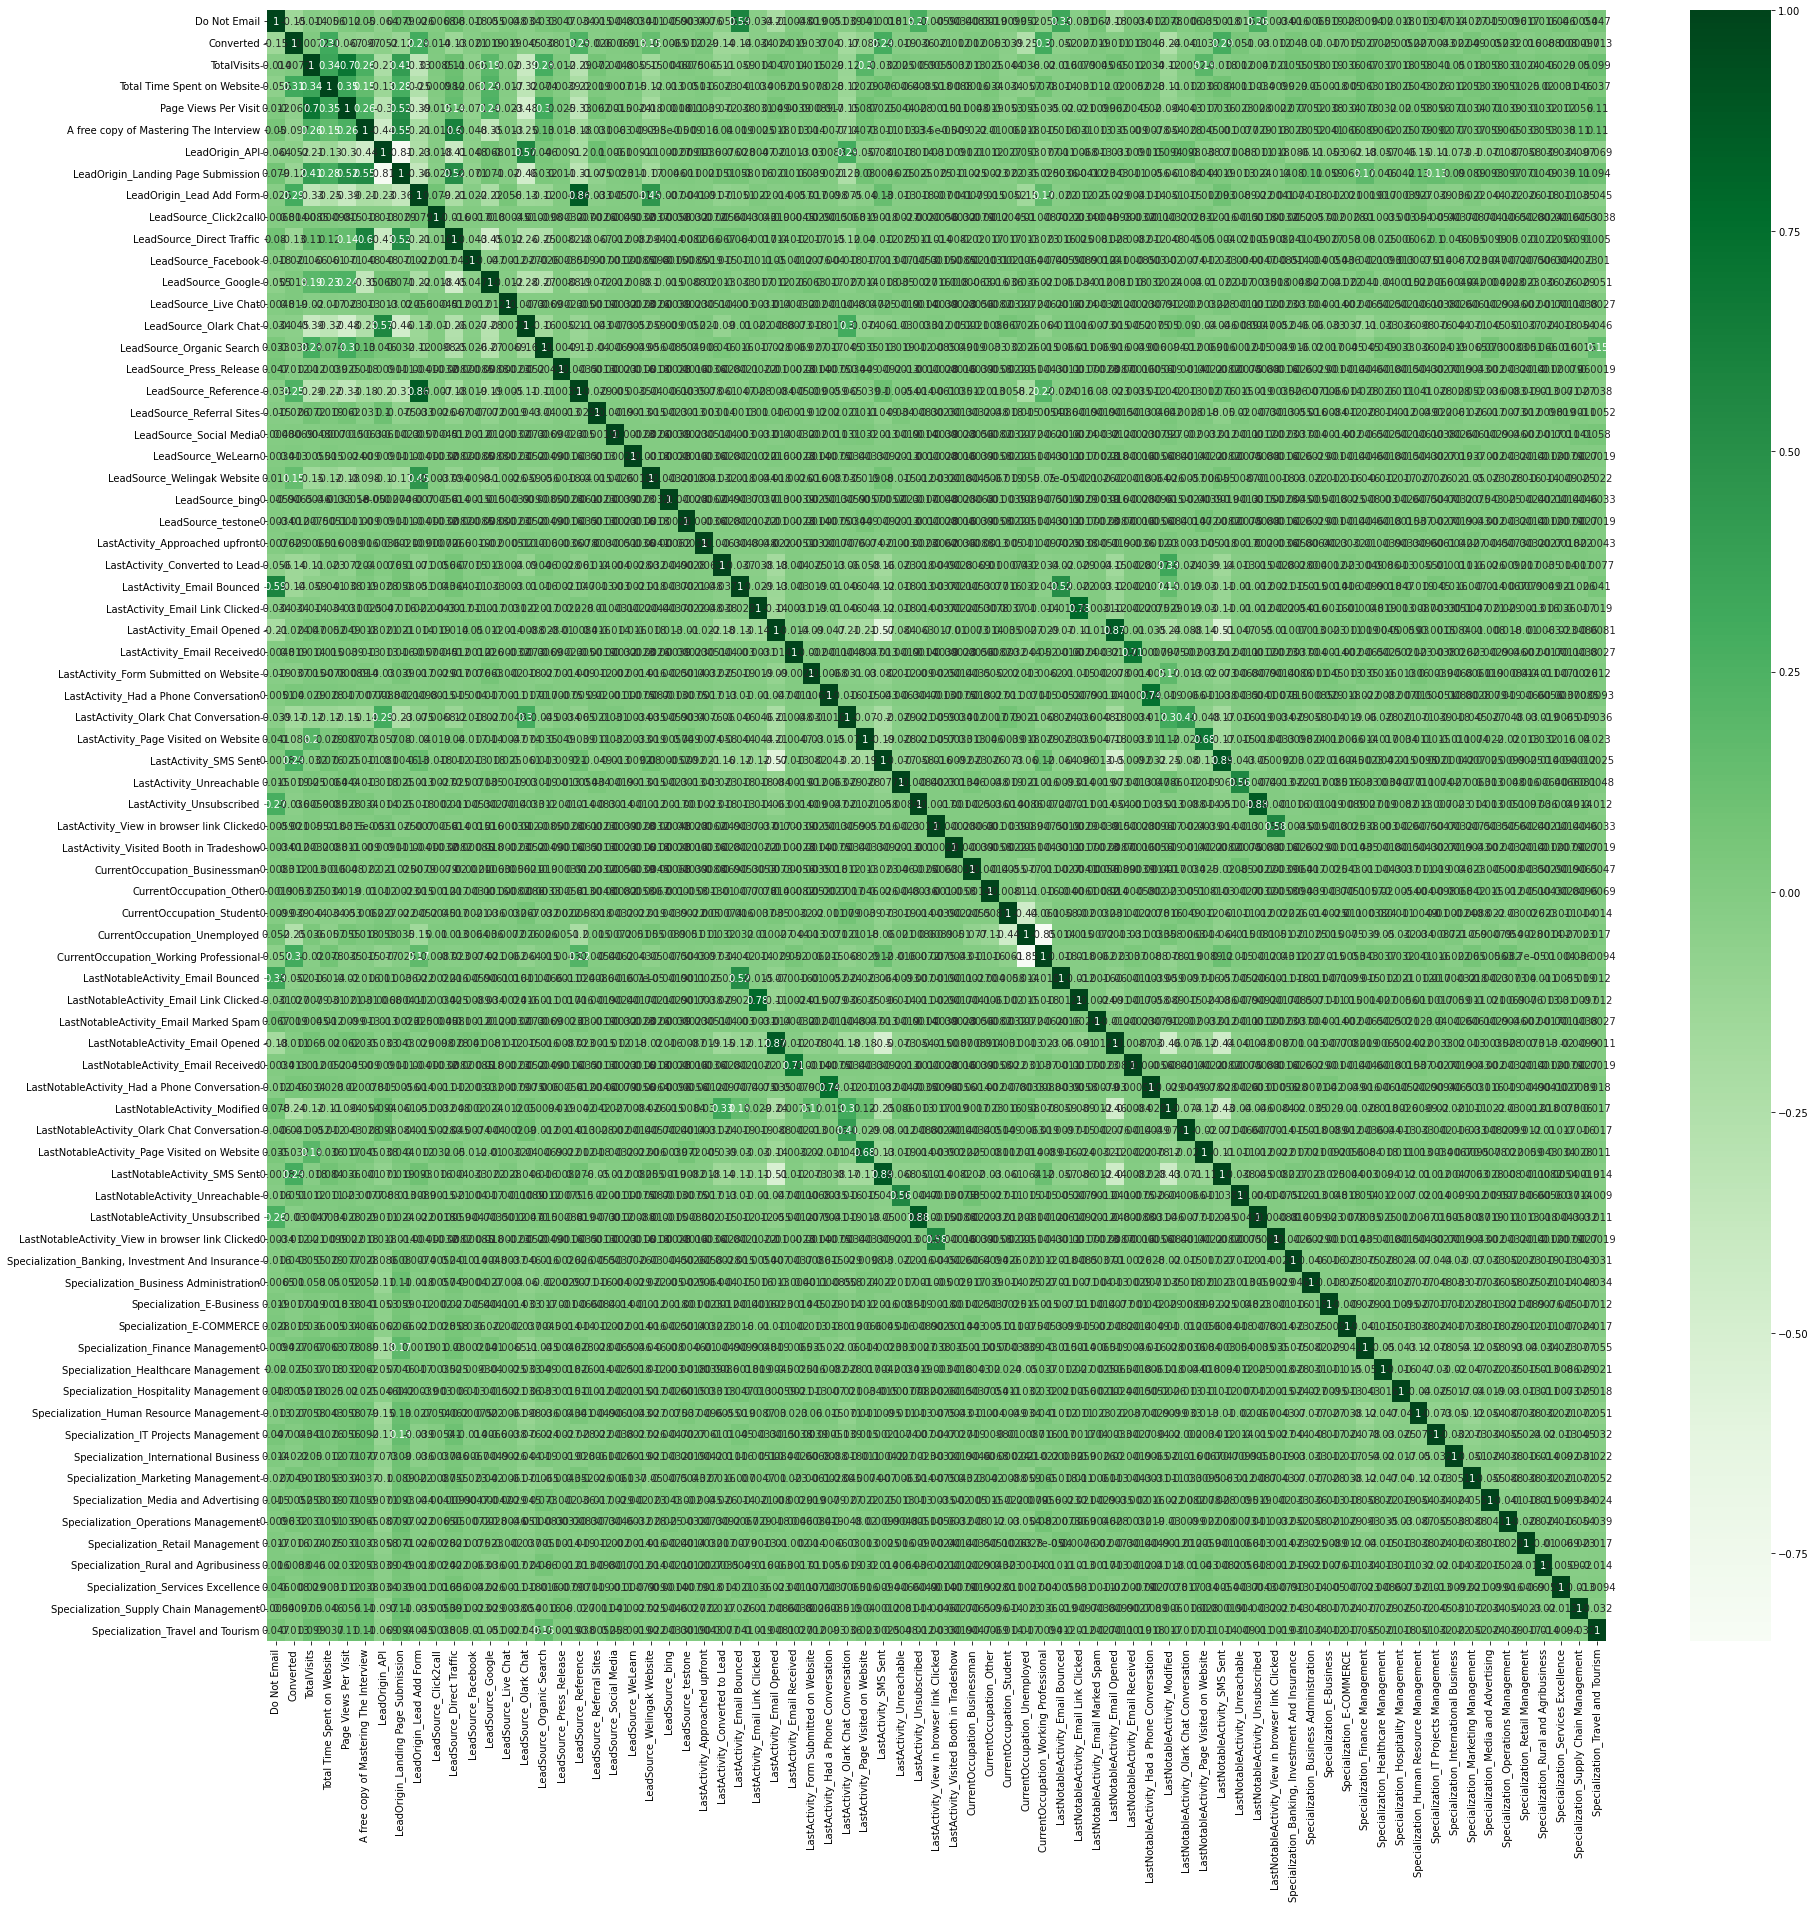

In [73]:
# Let's see the correlation matrix, Using heatmap for correlation
plt.figure(figsize = (30,30)) 
sns.heatmap(Leads.corr(), cmap="Greens",annot = True)
plt.show()

Due to the large number of features in the data set and the laborious nature of manually removing each feature one at a time, RFE is employed to do so. Starting with the 15 features that made the shortlist, the statsmodel library will be applied.

## 9. Feature Selection Using RFE

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_

array([ True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 48),
 ('LeadOrigin_API', False, 4),
 ('LeadOrigin_Landing Page Submission', False, 3),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadSource_Click2call', False, 53),
 ('LeadSource_Direct Traffic', False, 14),
 ('LeadSource_Facebook', False, 13),
 ('LeadSource_Google', False, 17),
 ('LeadSource_Live Chat', False, 51),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 15),
 ('LeadSource_Press_Release', False, 56),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 16),
 ('LeadSource_Social Media', False, 39),
 ('LeadSource_WeLearn', False, 43),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', False, 52),
 ('LeadSource_testone', False, 44),
 ('LastActivity_Approached upfront', False, 2),
 ('LastActivity_Converted to Lead', False, 8),
 ('LastAct

In [78]:
# Attributes selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Reference', 'LeadSource_Welingak Website',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [79]:
# Attributes rejected by RFE
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadSource_Click2call', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_Organic Search', 'LeadSource_Press_Release',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_testone',
       'LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened', 'LastActivity_Email Received',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website', 'LastActivity_Unreachable',
       'LastActivity_Unsubscribed',
       'LastActivity_View in browser link Clicked',
       'LastActivity_Visited Booth in Tradeshow',
       'CurrentOccupation_Businessman', 'CurrentOccupa

You now have all the variables that RFE choose, and since we are interested in the statistical component, specifically P-values and VIF, Let's utilise Statsmodel to develop a Logistic Regression Model with these variables.

## 10. Model Building - Assessing the model with StatsModels

### Model 1

In [80]:
# Fit a Logistic Regression Model on X-train after adding a constant and output the summary 

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm1.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4342
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.9
Date:                Sun, 16 Oct 2022   Deviance:                       3963.8
Time:                        23:05:03   Pearson chi2:                 4.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3786
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.0502      0.638     -1.646      0.100      -2.301       0.200
Do Not Email                                    -1.5308      0.199     -7.698      0.000      -1.921      -1.141
TotalVisits                                      1.4701      0.280      5.255      0.000       0.922       2.018
Total Time Spent on Website                      4.5649      0.191     23.862      0.000       4.190       4.940
LeadOrigin_Lead Add Form                         2.5163      1.223      2.057      0.040       0.119       4.914
LeadSource_Olark Chat                            1.9150      0.138     13.879      0.000       1.645       2.185
LeadSource_Reference                             1.7404      1.244      1.399      0.162      -0.698       4.179
LeadSource_Welingak Website                      3.3003      1.420      2.324      0.020       0.517       6.084
LastActivity_Had a Phone Conversation            2.7431      1.532      1.790      0.073      -0.260       5.746
LastActivity_Olark Chat Conversation            -1.0858      0.185     -5.862      0.000      -1.449      -0.723
LastActivity_SMS Sent                            1.2094      0.086     14.113      0.000       1.041       1.377
CurrentOccupation_Student                       -1.6427      0.667     -2.461      0.014      -2.951      -0.335
CurrentOccupation_Unemployed                    -1.4552      0.631     -2.305      0.021      -2.693      -0.218
CurrentOccupation_Working Professional           1.0059      0.657      1.532      0.125      -0.281       2.293
LastNotableActivity_Had a Phone Conversation    20.0681   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
LastNotableActivity_Unreachable                  2.7844      0.805      3.459      0.001       1.207       4.362
================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05 we need to care of them but first lets also calculate VIF

In [81]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadOrigin_Lead Add Form,67.02
5,LeadSource_Reference,53.88
6,LeadSource_Welingak Website,14.63
11,CurrentOccupation_Unemployed,5.34
1,TotalVisits,3.34
7,LastActivity_Had a Phone Conversation,3.26
13,LastNotableActivity_Had a Phone Conversation,3.25
2,Total Time Spent on Website,2.45
12,CurrentOccupation_Working Professional,1.81
4,LeadSource_Olark Chat,1.76


In [82]:
# Removing the 'LeadSource_Reference' because it's VIF value is greater than 5 and P-value is also more than 0.05
col = col.drop('LeadSource_Reference',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

### Model 2 

In [83]:
# Refit the model with the new set of features

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm2.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4343
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1982.7
Date:                Sun, 16 Oct 2022   Deviance:                       3965.3
Time:                        23:05:03   Pearson chi2:                 4.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.0476      0.638     -1.642      0.101      -2.298       0.203
Do Not Email                                    -1.5277      0.199     -7.694      0.000      -1.917      -1.138
TotalVisits                                      1.4661      0.280      5.239      0.000       0.918       2.015
Total Time Spent on Website                      4.5621      0.191     23.847      0.000       4.187       4.937
LeadOrigin_Lead Add Form                         4.2142      0.252     16.753      0.000       3.721       4.707
LeadSource_Olark Chat                            1.9120      0.138     13.850      0.000       1.641       2.183
LeadSource_Welingak Website                      1.5998      0.759      2.108      0.035       0.112       3.087
LastActivity_Had a Phone Conversation            2.7407      1.531      1.790      0.074      -0.261       5.742
LastActivity_Olark Chat Conversation            -1.0850      0.185     -5.859      0.000      -1.448      -0.722
LastActivity_SMS Sent                            1.2096      0.086     14.119      0.000       1.042       1.377
CurrentOccupation_Student                       -1.6404      0.667     -2.459      0.014      -2.948      -0.333
CurrentOccupation_Unemployed                    -1.4561      0.631     -2.307      0.021      -2.693      -0.219
CurrentOccupation_Working Professional           1.0061      0.656      1.533      0.125      -0.280       2.293
LastNotableActivity_Had a Phone Conversation    20.0712   1.25e+04      0.002      0.999   -2.46e+04    2.46e+04
LastNotableActivity_Unreachable                  2.7845      0.805      3.459      0.001       1.207       4.362
================================================================================================================
"""

In [84]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,CurrentOccupation_Unemployed,5.33
1,TotalVisits,3.33
6,LastActivity_Had a Phone Conversation,3.26
12,LastNotableActivity_Had a Phone Conversation,3.25
2,Total Time Spent on Website,2.44
11,CurrentOccupation_Working Professional,1.80
3,LeadOrigin_Lead Add Form,1.77
4,LeadSource_Olark Chat,1.75
8,LastActivity_SMS Sent,1.66
5,LeadSource_Welingak Website,1.28


In [85]:
# Removing the 'LastNotableActivity_Had a Phone Conversation' because of it's high P-value
col = col.drop('LastNotableActivity_Had a Phone Conversation',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Unreachable'],
      dtype='object')

### Model 3 

In [86]:
# Refit the model with the new set of features

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm3.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4344
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.3
Date:                Sun, 16 Oct 2022   Deviance:                       3966.6
Time:                        23:05:03   Pearson chi2:                 4.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3782
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0492      0.638     -1.645      0.100      -2.300       0.201
Do Not Email                              -1.5369      0.199     -7.734      0.000      -1.926      -1.147
TotalVisits                                1.4705      0.280      5.255      0.000       0.922       2.019
Total Time Spent on Website                4.5628      0.191     23.850      0.000       4.188       4.938
LeadOrigin_Lead Add Form                   4.2161      0.252     16.758      0.000       3.723       4.709
LeadSource_Olark Chat                      1.9132      0.138     13.857      0.000       1.643       2.184
LeadSource_Welingak Website                1.6010      0.759      2.109      0.035       0.113       3.088
LastActivity_Had a Phone Conversation      3.7417      1.187      3.152      0.002       1.415       6.068
LastActivity_Olark Chat Conversation      -1.0852      0.185     -5.859      0.000      -1.448      -0.722
LastActivity_SMS Sent                      1.2099      0.086     14.121      0.000       1.042       1.378
CurrentOccupation_Student                 -1.6401      0.667     -2.458      0.014      -2.948      -0.332
CurrentOccupation_Unemployed              -1.4555      0.631     -2.306      0.021      -2.693      -0.218
CurrentOccupation_Working Professional     1.0068      0.656      1.534      0.125      -0.280       2.293
LastNotableActivity_Unreachable            2.7844      0.805      3.459      0.001       1.207       4.362
==========================================================================================================
"""

In [87]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,CurrentOccupation_Unemployed,5.33
1,TotalVisits,3.33
2,Total Time Spent on Website,2.44
11,CurrentOccupation_Working Professional,1.80
3,LeadOrigin_Lead Add Form,1.77
4,LeadSource_Olark Chat,1.75
8,LastActivity_SMS Sent,1.66
5,LeadSource_Welingak Website,1.28
7,LastActivity_Olark Chat Conversation,1.23
9,CurrentOccupation_Student,1.15


In [88]:
# Removing the 'CurrentOccupation_Unemployed' because of it's high VIF
col = col.drop('CurrentOccupation_Unemployed',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Student', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Unreachable'],
      dtype='object')

### Model 4 

In [89]:
# Refit the model with the new set of features

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm4.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4345
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.3
Date:                Sun, 16 Oct 2022   Deviance:                       3972.7
Time:                        23:05:04   Pearson chi2:                 4.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3773
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4985      0.111    -22.534      0.000      -2.716      -2.281
Do Not Email                              -1.5431      0.199     -7.769      0.000      -1.932      -1.154
TotalVisits                                1.4859      0.280      5.310      0.000       0.937       2.034
Total Time Spent on Website                4.5721      0.191     23.910      0.000       4.197       4.947
LeadOrigin_Lead Add Form                   4.2192      0.251     16.778      0.000       3.726       4.712
LeadSource_Olark Chat                      1.9116      0.138     13.851      0.000       1.641       2.182
LeadSource_Welingak Website                1.5974      0.759      2.105      0.035       0.110       3.085
LastActivity_Had a Phone Conversation      3.7337      1.188      3.143      0.002       1.405       6.062
LastActivity_Olark Chat Conversation      -1.0925      0.185     -5.900      0.000      -1.455      -0.730
LastActivity_SMS Sent                      1.2002      0.086     14.029      0.000       1.033       1.368
CurrentOccupation_Student                 -0.1927      0.224     -0.860      0.390      -0.632       0.247
CurrentOccupation_Working Professional     2.4547      0.190     12.945      0.000       2.083       2.826
LastNotableActivity_Unreachable            2.7734      0.805      3.445      0.001       1.196       4.351
==========================================================================================================
"""

In [90]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,2.05
1,TotalVisits,1.99
8,LastActivity_SMS Sent,1.53
3,LeadOrigin_Lead Add Form,1.46
5,LeadSource_Welingak Website,1.28
4,LeadSource_Olark Chat,1.24
10,CurrentOccupation_Working Professional,1.22
7,LastActivity_Olark Chat Conversation,1.20
0,Do Not Email,1.04
9,CurrentOccupation_Student,1.04


In [91]:
# Removing the 'CurrentOccupation_Student' because of it's high p-value
col = col.drop('CurrentOccupation_Student',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Unreachable'],
      dtype='object')

### Model 5 

In [92]:
# Refit the model with the new set of features

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm5.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4346
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.7
Date:                Sun, 16 Oct 2022   Deviance:                       3973.4
Time:                        23:05:04   Pearson chi2:                 4.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3772
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.5063      0.111    -22.669      0.000      -2.723      -2.290
Do Not Email                              -1.5384      0.199     -7.749      0.000      -1.927      -1.149
TotalVisits                                1.4897      0.280      5.322      0.000       0.941       2.038
Total Time Spent on Website                4.5709      0.191     23.909      0.000       4.196       4.946
LeadOrigin_Lead Add Form                   4.2107      0.251     16.768      0.000       3.719       4.703
LeadSource_Olark Chat                      1.9077      0.138     13.833      0.000       1.637       2.178
LeadSource_Welingak Website                1.6097      0.759      2.121      0.034       0.123       3.097
LastActivity_Had a Phone Conversation      3.7392      1.187      3.149      0.002       1.412       6.067
LastActivity_Olark Chat Conversation      -1.0973      0.185     -5.927      0.000      -1.460      -0.734
LastActivity_SMS Sent                      1.2052      0.085     14.116      0.000       1.038       1.372
CurrentOccupation_Working Professional     2.4614      0.189     12.989      0.000       2.090       2.833
LastNotableActivity_Unreachable            2.7808      0.805      3.455      0.001       1.203       4.359
==========================================================================================================
"""

In [93]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,2.05
1,TotalVisits,1.98
8,LastActivity_SMS Sent,1.53
3,LeadOrigin_Lead Add Form,1.45
5,LeadSource_Welingak Website,1.28
4,LeadSource_Olark Chat,1.23
9,CurrentOccupation_Working Professional,1.22
7,LastActivity_Olark Chat Conversation,1.20
0,Do Not Email,1.04
6,LastActivity_Had a Phone Conversation,1.01


Now that we have our model, we can see.

The importance of the variables is indicated by their p values, and their association with one another is shown by their VIF values.


Both the VIFs and the p-values fall within a reasonable range. Therefore, we proceed to make our forecasts solely based on this model.

## 11. Creating Prediction

In this case study, the logistic regression curve gives us the probabilities of 'conversion' and 'non-conversion'. 
We can get these probabilities by simply using the 'predict' function.

In [94]:
# Predicting the probabilities (of the "converted" value being 1) on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [95]:
y_train_pred[:10]

array([0.49376061, 0.99537157, 0.98922004, 0.77015502, 0.18592982,
       0.58854338, 0.18444707, 0.5054769 , 0.35465899, 0.41403957])

In [96]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,1,0.493761,4305
1,1,0.995372,2675
2,1,0.989220,7045
3,1,0.770155,2027
4,0,0.185930,1410


In [97]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,1,0.493761,4305,0
1,1,0.995372,2675,1
2,1,0.989220,7045,1
3,1,0.770155,2027,1
4,0,0.185930,1410,0


We can see that the values in the 'Predicted' column remain '0' when the corresponding values in the 'Conversion_Prob' column are below 0.5. As soon as the value in the 'Conversion Prob' becomes greater than 0.5, the correspondingvalue in the 'Predicted' column becomes '1'.

## 12. Model Evaluation

In [98]:
# Checking the accuracy with cut-off being 0.5
# Checking the confusion metrics and accuracy

confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1863  383]
 [ 524 1588]]


In [99]:
# checking the overall accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.791877007801744


Accuracy rate for the model is a decent 79.18%, but we can't rely only on Accuracy. We also need to use other metrics.

Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7518939393939394

In [102]:
# Let us calculate specificity

TN / float(TN+FP)

0.8294746215494212

In [103]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.1705253784505788


In [104]:
# positive predictive value 

print (TP / float(TP+FP))

0.8056823947234906


In [105]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7804775869291999


Our model seems to have high accuracy (79.18%), low sensitivity (75.18%) and high specificity (82.94%).
Since we're interested in identifying the customers which might convert, we clearly need to deal with this.
We will deal with this situation with the help of ROC Curves in the next section.

## 13. Plotting the ROC Curve ('Receiver Operating Characteristic' Curve)

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

TPR = True Positive Rate --> Out of actually 'converted' cases, how many is the model correctly predicting as 'converted'

FPR = False Positive Rate --> Out of actual 'non-convert' cases, how many is the model incorrectly predicting as 'converted'

Thus we would want as high TPR as possible & as low FPR as possible. Ideal model would have TPR = 1 and FPR = 0.

ROC Curve shows the trade-off between TPR and FPR.

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

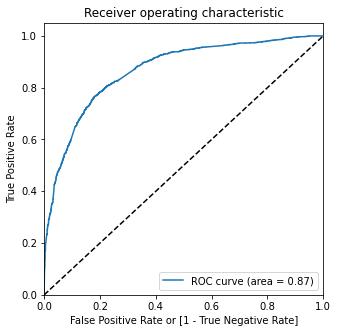

In [108]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The ROC's 0.87 area under the curve is a respectable value. So it appears that we have a sound model. To determine the best cutoff point, let's additionally examine the tradeoff between sensitivity and specificity.

## 14. Finding Optimal Cutoff Point

### Sensitivity and Specificity

In [109]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.493761,4305,0,1,1,1,1,1,0,0,0,0,0
1,1,0.995372,2675,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989220,7045,1,1,1,1,1,1,1,1,1,1,1
3,1,0.770155,2027,1,1,1,1,1,1,1,1,1,0,0
4,0,0.185930,1410,0,1,1,0,0,0,0,0,0,0,0


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.484626  1.000000  0.000000
0.1   0.1  0.546581  0.991004  0.128673
0.2   0.2  0.726251  0.938920  0.526269
0.3   0.3  0.762047  0.901989  0.630454
0.4   0.4  0.788894  0.808712  0.770258
0.5   0.5  0.791877  0.751894  0.829475
0.6   0.6  0.779945  0.684659  0.869546
0.7   0.7  0.746673  0.565341  0.917186
0.8   0.8  0.715925  0.462595  0.954141
0.9   0.9  0.648463  0.292614  0.983081


In [111]:
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.484626,1.000000,0.000000
0.1,0.1,0.546581,0.991004,0.128673
0.2,0.2,0.726251,0.938920,0.526269
0.3,0.3,0.762047,0.901989,0.630454
0.4,0.4,0.788894,0.808712,0.770258
0.5,0.5,0.791877,0.751894,0.829475
0.6,0.6,0.779945,0.684659,0.869546
0.7,0.7,0.746673,0.565341,0.917186
0.8,0.8,0.715925,0.462595,0.954141
0.9,0.9,0.648463,0.292614,0.983081


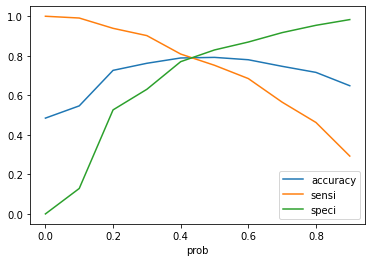

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

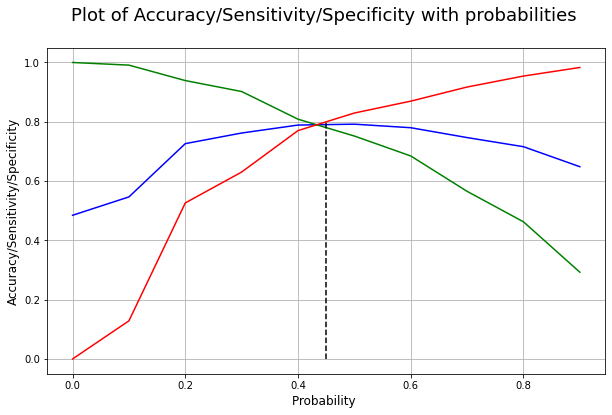

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize = (10,6))

sns.lineplot(cutoff_df.prob , cutoff_df.accuracy , color = "blue")
sns.lineplot(cutoff_df.prob , cutoff_df.sensi , color = "green")
sns.lineplot(cutoff_df.prob , cutoff_df.speci , color = "red")
plt.plot([0.45, 0.45], [0, 0.8], 'k--')


plt.title("Plot of Accuracy/Sensitivity/Specificity with probabilities \n", fontdict={'fontsize': 18, 'fontweight' : 18})


plt.xlabel("Probability ", fontdict={'fontsize': 12, 'fontweight' : 18})
plt.ylabel("Accuracy/Sensitivity/Specificity", fontdict={'fontsize': 12, 'fontweight' : 18})

plt.grid()
plt.show()

#### As you can see that around 0.43,you get the optimal values of three metrics so lets choose 0.43 as our cutoff 

In [114]:
y_train_pred_final['final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.43 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.493761,4305,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.995372,2675,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989220,7045,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.770155,2027,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.185930,1410,0,1,1,0,0,0,0,0,0,0,0,0


In [115]:
# Now let us calculate the lead score

y_train_pred_final['lead_score_board'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,lead_score_board
0,1,0.493761,4305,0,1,1,1,1,1,0,0,0,0,0,1,49
1,1,0.995372,2675,1,1,1,1,1,1,1,1,1,1,1,1,100
2,1,0.989220,7045,1,1,1,1,1,1,1,1,1,1,1,1,99
3,1,0.770155,2027,1,1,1,1,1,1,1,1,1,0,0,1,77
4,0,0.185930,1410,0,1,1,0,0,0,0,0,0,0,0,0,19
5,0,0.588543,3764,1,1,1,1,1,1,1,0,0,0,0,1,59
6,0,0.184447,6720,0,1,1,0,0,0,0,0,0,0,0,0,18
7,1,0.505477,859,1,1,1,1,1,1,1,0,0,0,0,1,51
8,1,0.354659,4774,0,1,1,1,1,0,0,0,0,0,0,0,35
9,0,0.414040,3342,0,1,1,1,1,1,0,0,0,0,0,0,41


In [116]:
# Checking if 75% cases are correctly predicted based on the converted column.
# Get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1670
0     442
Name: final_Predicted, dtype: int64

In [117]:
# Percentage of final_predicted conversions

1670/float(1670+442)

0.790719696969697

In [118]:
#Lets check  accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.7907296925195043


In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1776,  470],
       [ 442, 1670]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# The Sensitivity of our logistic regression model

TP / float(TP+FN)

0.790719696969697

In [122]:
# Let us calculate specificity

TN / float(TN+FP)

0.7907390917186109

In [123]:
# Calculate false postive rate - predicting conversion when customer has not have converted
print(FP/ float(TN+FP))

0.20926090828138913


In [124]:
# Positive predictive value 
print (TP / float(TP+FP))

0.780373831775701


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8007213706041478


Accuracy = 0.79072

Sensitivity = 0.79071

Specificity = 0.79073

### Precision and Recall

In [126]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[1776,  470],
       [ 442, 1670]], dtype=int64)

In [127]:
# Precision = TP/ (TP + FP)
# Probability that a predicted 'Yes' is actually a 'Yes'.

# Precision:
TP/ (TP + FP)

0.780373831775701

In [128]:
# Alternately, Precision:
confusion[1,1]/(confusion[0,1] + confusion[1,1])

0.780373831775701

In [129]:
# Recall = TP/ (TP + FN)
# Probability that an actual 'Yes' case is predicted correctly.

# Recall:
TP/ (TP + FN)

0.790719696969697

In [130]:
# Alternately, Recall:
confusion[1,1]/(confusion[1,0] + confusion[1,1])

0.790719696969697

In [131]:
# Using sklearn utilities for the same

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.780373831775701

In [132]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.790719696969697

### Precision and recall tradeoff

In [133]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted

(0       1
 1       1
 2       1
 3       1
 4       0
        ..
 4353    0
 4354    0
 4355    1
 4356    1
 4357    1
 Name: Converted, Length: 4358, dtype: int64,
 0       1
 1       1
 2       1
 3       1
 4       0
        ..
 4353    0
 4354    0
 4355    1
 4356    0
 4357    1
 Name: final_Predicted, Length: 4358, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

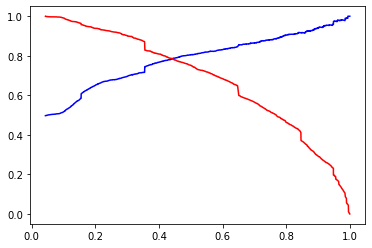

In [135]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

As per the above graph, the cut-off value is approximately 0.43

## 15. Making predictions on the test set

Finally, since we've chosen the optimal scenario based on the evaluation metrics, we'll finally go on and 
make predictions on the test data set and see how our model performs there as well.
In this session, we will go forward with the sensitivity-specificity view of things and make predictions
based on the 0.40 cut-off that we decided earlier.

In [136]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [137]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_Working Professional,LastNotableActivity_Unreachable
5067,0,0.294118,0.075264,0,0,0,0,0,0,0,0
5655,0,0.058824,0.218310,0,0,0,0,0,0,0,0
8114,0,0.294118,0.615757,0,0,0,0,0,0,0,0
1931,0,0.000000,0.000000,0,1,0,0,0,1,0,0
3325,0,0.000000,0.000000,1,0,0,0,0,1,0,0


In [138]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [139]:
#Check X_test_sm
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_Working Professional,LastNotableActivity_Unreachable
5067,1.0,0,0.294118,0.075264,0,0,0,0,0,0,0,0
5655,1.0,0,0.058824,0.218310,0,0,0,0,0,0,0,0
8114,1.0,0,0.294118,0.615757,0,0,0,0,0,0,0,0
1931,1.0,0,0.000000,0.000000,0,1,0,0,0,1,0,0
3325,1.0,0,0.000000,0.000000,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7805,1.0,0,0.176471,0.447623,0,0,0,0,0,1,0,0
791,1.0,0,0.470588,0.220511,0,0,0,0,0,0,0,0
2933,1.0,0,0.000000,0.000000,1,0,0,0,0,0,1,0
2402,1.0,0,0.352941,0.381162,0,0,0,0,0,0,0,0


In [140]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5067    0.151340
5655    0.194534
8114    0.678394
1931    0.647149
3325    0.948316
6755    0.931078
6837    0.145463
930     0.231604
6636    0.792473
1788    0.870560
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
5067,0.151340
5655,0.194534
8114,0.678394
1931,0.647149
3325,0.948316


In [142]:
# Converting y_test to dataframe
y_test_dataframe = pd.DataFrame(y_test)

In [143]:
y_test_dataframe['Lead ID'] = y_test_dataframe.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_dataframe.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_dataframe and y_test_pred
y_pred_final = pd.concat([y_test_dataframe, y_test_pred],axis=1)

In [146]:
# Checking the head() of the final dataframe
y_pred_final.head()

,Converted,Lead ID,0
0,0,5067,0.151340
1,1,5655,0.194534
2,0,8114,0.678394
3,1,1931,0.647149
4,1,3325,0.948316


In [147]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [148]:
y_pred_final['Lead_Score_Board'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Lead ID,Converted_Prob,Lead_Score_Board
0,0,5067,0.151340,15
1,1,5655,0.194534,19
2,0,8114,0.678394,68
3,1,1931,0.647149,65
4,1,3325,0.948316,95


In [149]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_Prob', 'Lead_Score_Board'], axis=1)

In [150]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,Lead_Score_Board
0,5067,0,0.151340,15
1,5655,1,0.194534,19
2,8114,0,0.678394,68
3,1931,1,0.647149,65
4,3325,1,0.948316,95


In [151]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [152]:
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,Lead_Score_Board,final_predicted
0,5067,0,0.151340,15,0
1,5655,1,0.194534,19,0
2,8114,0,0.678394,68,1
3,1931,1,0.647149,65,1
4,3325,1,0.948316,95,1


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.784796573875803

In [154]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[778, 209],
       [193, 688]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.784796573875803

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7809307604994324

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.7882472137791287

Accuracy = 0.785

sensitivity = 0.799

Specificity = 0.773

In [159]:
# Precision and Recall metrics for the test set

# precision
print('Precision - ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('Recall -',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision -  0.7670011148272018
Recall - 0.7809307604994324


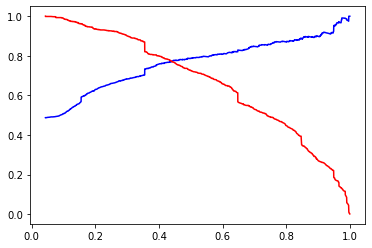

In [160]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 16. Final Observation

Comparing the values obtained for Train & Test data set:

Train Data:

Accuracy = 0.79072

Sensitivity = 0.79071

Specificity = 0.79073

Test Data:

Accuracy = 0.785

sensitivity = 0.799

Specificity = 0.773

## 17. Conclusion

After assessing our model, we can see that the accuracy, sensitivity, and specificity values for both the train and test data have been around 79%.

-The prediction was done on an optimal cut off of 0.43.

We found that the following columns matter the most for our evaluation:

1)Current Occupation – Unemployed

2)Total time spent on website

3)LeadOrigin_Lead Add Form

4)Last Activity as SMS sent

5)Lead Source as Olark chat

6)TotalVisits